# Mental Health and Music

### Impact of Favorite Genre on Mental Health

Question: Does the favorite genre of music have an impact on mental health conditions?

Analysis: Compare mental health scores for different favorite genres.

In [22]:
#Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [23]:
#Open file and save to a variable
music=Path("./Data/mxmh_survey_results.csv")

#Read CSV as a DataFrame
music_df=pd.read_csv(music)
music_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [24]:
#Clean data
music_df.count()
cleaned=music_df.dropna()
cleaned.count()

Timestamp                       616
Age                             616
Primary streaming service       616
Hours per day                   616
While working                   616
Instrumentalist                 616
Composer                        616
Fav genre                       616
Exploratory                     616
Foreign languages               616
BPM                             616
Frequency [Classical]           616
Frequency [Country]             616
Frequency [EDM]                 616
Frequency [Folk]                616
Frequency [Gospel]              616
Frequency [Hip hop]             616
Frequency [Jazz]                616
Frequency [K pop]               616
Frequency [Latin]               616
Frequency [Lofi]                616
Frequency [Metal]               616
Frequency [Pop]                 616
Frequency [R&B]                 616
Frequency [Rap]                 616
Frequency [Rock]                616
Frequency [Video game music]    616
Anxiety                     

In [25]:
#Create a DataFrame of cleaned data
cleaned_df=pd.DataFrame(cleaned)
cleaned_df.head()
cleaned_df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [26]:
#Reduce DataFrame to pertinent columns
df=cleaned_df[['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
df

,Fav genre,Anxiety,Depression,Insomnia,OCD
2,Video game music,7.0,7.0,10.0,2.0
3,Jazz,9.0,7.0,3.0,3.0
4,R&B,7.0,2.0,5.0,9.0
5,Jazz,8.0,8.0,7.0,7.0
6,Video game music,4.0,8.0,6.0,0.0
...,...,...,...,...,...
731,Rock,7.0,6.0,0.0,9.0
732,Pop,3.0,2.0,2.0,5.0
733,Rap,2.0,2.0,2.0,2.0
734,Classical,2.0,3.0,2.0,1.0


In [27]:
# Group by 'Fav genre' and calculate the mean for each column
grouped_means = df.groupby('Fav genre').mean().reset_index()
grouped_means

,Fav genre,Anxiety,Depression,Insomnia,OCD
0,Classical,5.052632,4.368421,4.000000,2.447368
1,Country,5.700000,4.100000,2.600000,2.600000
2,EDM,5.361111,5.111111,3.944444,2.888889
3,Folk,6.640000,5.280000,4.040000,2.560000
4,Gospel,5.500000,3.500000,6.000000,0.500000
5,Hip hop,6.312500,6.093750,3.656250,2.656250
6,Jazz,5.684211,4.578947,4.052632,2.421053
7,K pop,6.523810,3.904762,3.190476,2.476190
8,Latin,5.000000,4.500000,4.500000,2.500000
9,Lofi,6.100000,6.600000,5.600000,3.400000


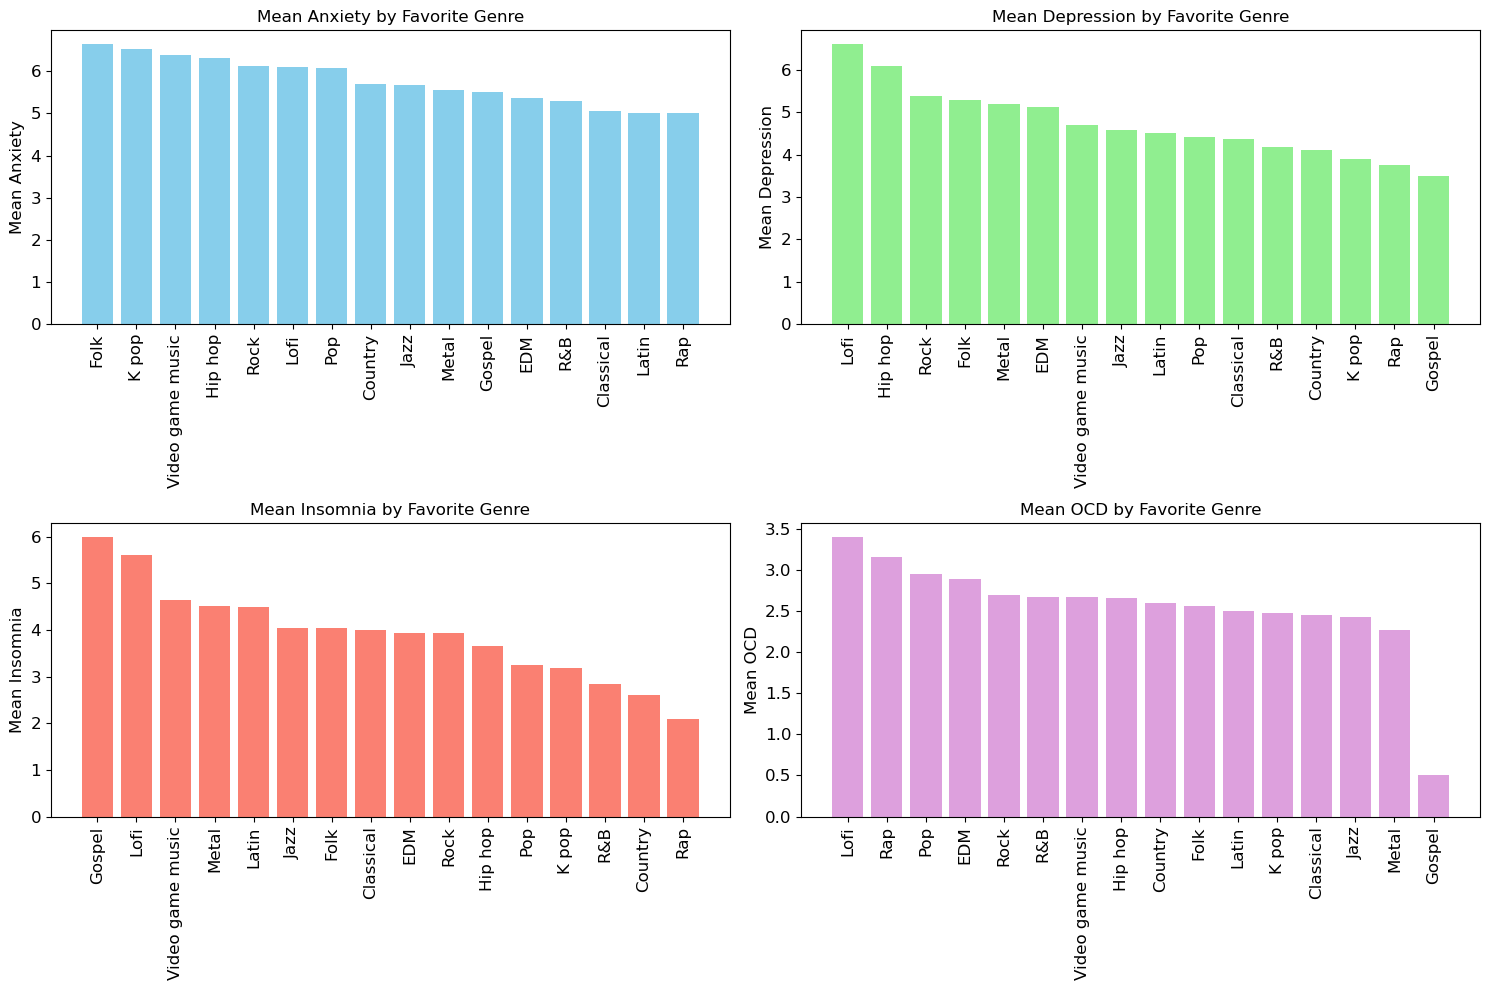

In [28]:
# Define colors for each of the four bar plots
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Plotting the means for each column with sorting and custom colors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a 2x2 subplot

# Font size
font_size = 12

# Sort and plot for 'Anxiety'
sorted_anxiety = grouped_means.sort_values(by='Anxiety', ascending=False)
axes[0, 0].bar(sorted_anxiety['Fav genre'], sorted_anxiety['Anxiety'], color=colors[0])
axes[0, 0].set_title('Mean Anxiety by Favorite Genre', fontsize=font_size)
axes[0, 0].set_ylabel('Mean Anxiety', fontsize=font_size)
axes[0, 0].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[0, 0].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'Depression'
sorted_depression = grouped_means.sort_values(by='Depression', ascending=False)
axes[0, 1].bar(sorted_depression['Fav genre'], sorted_depression['Depression'], color=colors[1])
axes[0, 1].set_title('Mean Depression by Favorite Genre', fontsize=font_size)
axes[0, 1].set_ylabel('Mean Depression', fontsize=font_size)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[0, 1].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'Insomnia'
sorted_insomnia = grouped_means.sort_values(by='Insomnia', ascending=False)
axes[1, 0].bar(sorted_insomnia['Fav genre'], sorted_insomnia['Insomnia'], color=colors[2])
axes[1, 0].set_title('Mean Insomnia by Favorite Genre', fontsize=font_size)
axes[1, 0].set_ylabel('Mean Insomnia', fontsize=font_size)
axes[1, 0].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[1, 0].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'OCD'
sorted_ocd = grouped_means.sort_values(by='OCD', ascending=False)
axes[1, 1].bar(sorted_ocd['Fav genre'], sorted_ocd['OCD'], color=colors[3])
axes[1, 1].set_title('Mean OCD by Favorite Genre', fontsize=font_size)
axes[1, 1].set_ylabel('Mean OCD', fontsize=font_size)
axes[1, 1].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[1, 1].tick_params(axis='y', labelsize=font_size)

plt.tight_layout()
plt.show()



# Next Steps
+ Perform p-value, t-test, etc to measure validity of hypothesis
+ Should I create scatterplots and linear regression?
+ Write Analysis
+ Create presentation with team
